In [55]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Census from USA population 2010 - 2015

With line graph or plot.

In [56]:
# Read a table 'full_census_table' from URL, 
# assign the select columns 'SEX', 'AGE', 4, 9 to 'partial' table ,
# assign the relabeled columns 2 to '2010', and 3 to '2015' to 'us_pop' table ,
# evaluate and assign the division of column 3 and 2 to 'ratio' array,
# assign the add columns 'Change', 'Total Growth', and 'Annual Growth' to 'census' table,
# evaluate the operations for each column
# change format of columns 2, 3, 4 to number and 5, 6 to percent.
data = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

full_census_table = Table.read_table(data)
full_census_table

partial = full_census_table.select(['SEX', 'AGE', 4, 9])
us_pop = partial.relabeled(2, '2010').relabeled(3, '2015')
ratio = (us_pop.column(3) / us_pop.column(2))
census = us_pop.with_columns(
    'Change', us_pop.column(3) - us_pop.column(2),
    'Total Growth', ratio - 1,
    'Anual Growth', ratio ** (1/5) - 1
)
census.set_format([2,3,4], NumberFormatter)
census.set_format([5,6], PercentFormatter)

SEX,AGE,2010,2015,Change,Total Growth,Anual Growth
0,0,"3,951,330","3,978,038","26,708",0.68%,0.13%
0,1,"3,957,888","3,968,564","10,676",0.27%,0.05%
0,2,"4,090,862","3,966,583","-124,279",-3.04%,-0.62%
0,3,"4,111,920","3,974,061","-137,859",-3.35%,-0.68%
0,4,"4,077,551","4,020,035","-57,516",-1.41%,-0.28%
0,5,"4,064,653","4,018,158","-46,495",-1.14%,-0.23%
0,6,"4,073,013","4,019,207","-53,806",-1.32%,-0.27%
0,7,"4,043,046","4,148,360","105,314",2.60%,0.52%
0,8,"4,025,604","4,167,887","142,283",3.53%,0.70%
0,9,"4,125,415","4,133,564","8,149",0.20%,0.04%


In [57]:
# Assign the census data where value 0 from column 'SEX' are drop,
# and where values between 0 and 100 from colum 'AGE' are visible to 'by_age' table
by_age = census.where('SEX', 0).drop('SEX').where('AGE', are.between(0, 100))
by_age

AGE,2010,2015,Change,Total Growth,Anual Growth
0,"3,951,330","3,978,038","26,708",0.68%,0.13%
1,"3,957,888","3,968,564","10,676",0.27%,0.05%
2,"4,090,862","3,966,583","-124,279",-3.04%,-0.62%
3,"4,111,920","3,974,061","-137,859",-3.35%,-0.68%
4,"4,077,551","4,020,035","-57,516",-1.41%,-0.28%
5,"4,064,653","4,018,158","-46,495",-1.14%,-0.23%
6,"4,073,013","4,019,207","-53,806",-1.32%,-0.27%
7,"4,043,046","4,148,360","105,314",2.60%,0.52%
8,"4,025,604","4,167,887","142,283",3.53%,0.70%
9,"4,125,415","4,133,564","8,149",0.20%,0.04%


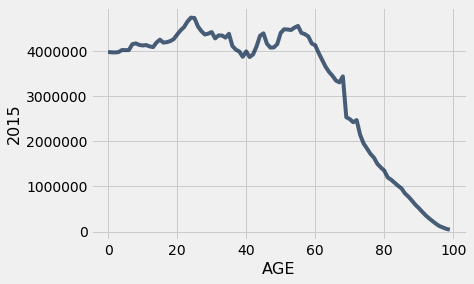

In [58]:
# Plot a line with the x from SEX',
# and the y form '2015' column.
by_age.plot(0, 2)

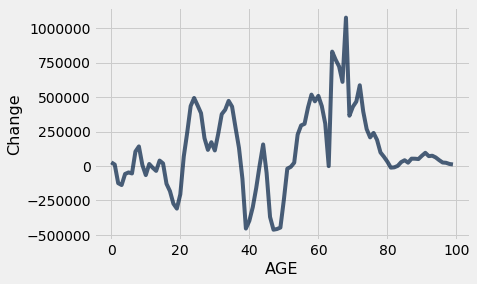

In [59]:
# Plot a line with the x from SEX',
# and the y form 'Change' column.
by_age.plot(0, 3)

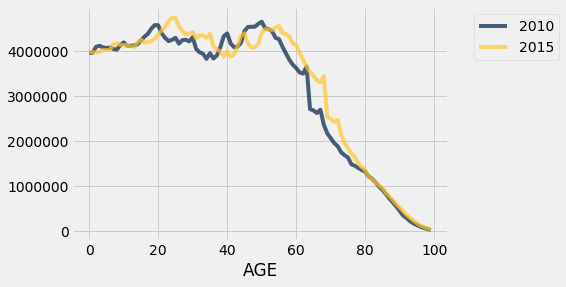

In [60]:
# Select 0, 1, 2 column to plot a line with x 'SEX'.
by_age.select(0, 1, 2).plot(0)

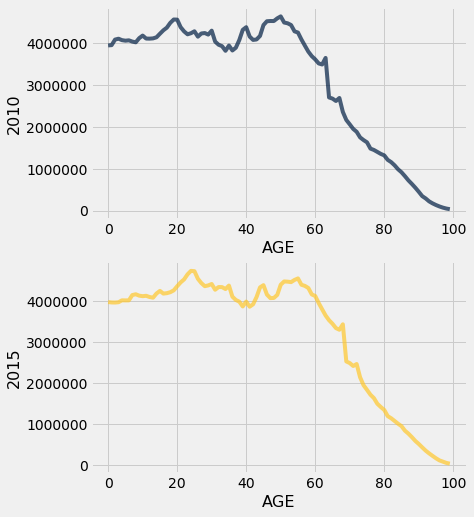

In [61]:
# Select 0, 1, 2 column to plot a line with x 'SEX' and overlay=False.
by_age.select(0, 1, 2).plot(0, overlay=False)

# Total population for females and males by age from 2015

In [62]:
# Read a table 'full' from URL, 
# assign the select columns 'SEX', 'AGE', 4, 9 to 'partial' table ,
# assign the relabeled columns 2 to '2010', and 3 to '2015' to 'us_pop' table ,
# set format of columns 2, 3 to number.
data = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

full = Table.read_table(data)
partial = full.select('SEX', 'AGE', 4, 9)
us_pop = partial.relabeled(2, '2010').relabeled(3, '2015')
us_pop.set_format([2, 3], NumberFormatter)

SEX,AGE,2010,2015
0,0,"3,951,330","3,978,038"
0,1,"3,957,888","3,968,564"
0,2,"4,090,862","3,966,583"
0,3,"4,111,920","3,974,061"
0,4,"4,077,551","4,020,035"
0,5,"4,064,653","4,018,158"
0,6,"4,073,013","4,019,207"
0,7,"4,043,046","4,148,360"
0,8,"4,025,604","4,167,887"
0,9,"4,125,415","4,133,564"


In [63]:
# evaluate and assign the difference from column '2015' and '2010' to 'change' array,
# assign the add columns 'Change', and 'Total Growth' to 'census' table,
# evaluate the operations for each column
# set format to the columns 'Change' to number and 'Total Growth' to percent.
change = us_pop.column('2015') - us_pop.column('2010')
census = us_pop.with_columns(
    'Change', change,
    'Total Growth', change / us_pop.column('2010')
)

census.set_format('Change', NumberFormatter)
census.set_format('Total Growth', PercentFormatter)

SEX,AGE,2010,2015,Change,Total Growth
0,0,"3,951,330","3,978,038","26,708",0.68%
0,1,"3,957,888","3,968,564","10,676",0.27%
0,2,"4,090,862","3,966,583","-124,279",-3.04%
0,3,"4,111,920","3,974,061","-137,859",-3.35%
0,4,"4,077,551","4,020,035","-57,516",-1.41%
0,5,"4,064,653","4,018,158","-46,495",-1.14%
0,6,"4,073,013","4,019,207","-53,806",-1.32%
0,7,"4,043,046","4,148,360","105,314",2.60%
0,8,"4,025,604","4,167,887","142,283",3.53%
0,9,"4,125,415","4,133,564","8,149",0.20%


In [64]:
# Assign the sort of column 'Change', descending=True and the row 0 to 'everyone' table,
# type its value.
everyone = census.sort('Change', descending=True).row(0)

type(everyone) # A row as individual item just like an array

datascience.tables.Row

In [65]:
# Add a column 'Anual Growth' to 'census' table,
# evaluate its operations,
# set format column 6 to percent,
# and sort 'Change' column, descending=True.
census = census.with_column(
    'Anual Growth', (census.column(5) + 1) ** (1/5) - 1
)

census.set_format(6, PercentFormatter)
census.sort('Change', descending=True)

SEX,AGE,2010,2015,Change,Total Growth,Anual Growth
0,999,"309,346,863","321,418,820","12,071,957",3.90%,0.77%
1,999,"152,088,043","158,229,297","6,141,254",4.04%,0.79%
2,999,"157,258,820","163,189,523","5,930,703",3.77%,0.74%
0,68,"2,359,816","3,436,357","1,076,541",45.62%,7.81%
0,64,"2,706,055","3,536,156","830,101",30.68%,5.50%
0,65,"2,678,525","3,450,043","771,518",28.80%,5.19%
0,66,"2,621,335","3,344,134","722,799",27.57%,4.99%
0,67,"2,693,707","3,304,187","610,480",22.66%,4.17%
0,72,"1,883,820","2,469,605","585,785",31.10%,5.56%
2,68,"1,254,117","1,812,428","558,311",44.52%,7.64%


In [66]:
# Asign the drop '2010' column where the values from column 'AGE' are between 999,
# and where the values from column 'SEX' are above to 0 to 'us_pop_2015' table;
# assign the values from column '2015' where the values from column 'SEX' is equal to 1  to 'males' array;
# assign the drop column 'SEX' where the value is equal to 2;
# relabeled column '2015' to 'Females', and add 'Males' column with its 'males' array to 'by_sex' table;
# set format 'Males' column to number.
us_pop_2015 = us_pop.drop('2010').where('AGE', are.below(999)).where('SEX', are.above(0))
males = us_pop_2015.where('SEX', 1).column('2015')
by_sex = us_pop_2015.where('SEX', 2).drop('SEX').relabeled('2015', 'Females').with_column(
    'Males', males
)

by_sex.set_format('Males', NumberFormatter)
by_sex

AGE,Females,Males
0,"1,942,904","2,035,134"
1,"1,939,269","2,029,295"
2,"1,939,979","2,026,604"
3,"1,943,417","2,030,644"
4,"1,964,111","2,055,924"
5,"1,967,310","2,050,848"
6,"1,968,544","2,050,663"
7,"2,031,242","2,117,118"
8,"2,039,062","2,128,825"
9,"2,021,886","2,111,678"


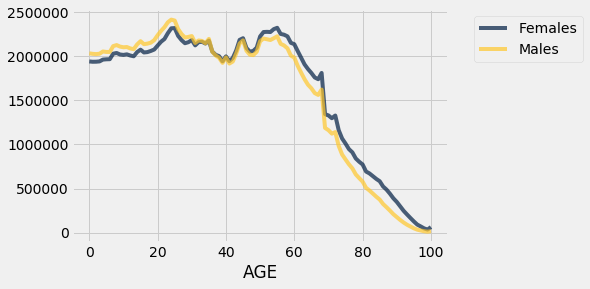

In [67]:
# Plot 'by_sex' table with the x 'AGE' or 0.
by_sex.plot(0)

# Proportion

In [74]:
# Read a table 'us_pop' from URL;
# assign the select columns 'SEX', 'AGE', 5, 8 to 'us_pop' table;
# assign the relabeled columns 2 to '2010', and 3 to '2014' to 'us_pop' table;
# set format of columns 2, 3 to number.
data = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

us_pop = Table.read_table(data)
us_pop = us_pop.select('SEX', 'AGE', 5, 8)
us_pop = us_pop.relabeled(2, '2010').relabeled(3, '2014')
us_pop

SEX,AGE,2010,2014
0,0,3963087,3949775
0,1,3966551,3949776
0,2,3971565,3959664
0,3,4102470,4007079
0,4,4122294,4005716
0,5,4087709,4006900
0,6,4074993,4135930
0,7,4083225,4155326
0,8,4053203,4120903
0,9,4035710,4108349


In [70]:
# Assign with '2010' drop column to 'us_pop_2014' table;
# assign the where values from column 'AGE' equal to 999 to 'all_ages' table;
# assign the item 0 from the column '2014' to 'pop_2014' array;
# assign the add 'Proportion' column with its operation
# and the set format 'Proportion' column to percent to 'all_ages' table;
us_pop_2014 = us_pop.drop('2010')
all_ages = us_pop_2014.where('AGE', are.equal_to(999))
pop_2014 = all_ages.column('2014').item(0)

all_ages = all_ages.with_column(
    'Proportion', all_ages.column('2014')/pop_2014
).set_format('Proportion', PercentFormatter)

all_ages

SEX,AGE,2014,Proportion
0,999,318907401,100.00%
1,999,156955337,49.22%
2,999,161952064,50.78%


In [72]:
# Assign from 'us_pop_2014' table the where column 'AGE' values are equal to 0 to 'infants' table;
# assign the item 0 from '2014' column to 'infants_2014' array;
# add 'Proportion' column with its operations, and set format to percent.
infants = us_pop_2014.where('AGE', are.equal_to(0))
infants_2014 = infants.column('2014').item(0)

infants = infants.with_column(
    'Proportion', infants.column('2014')/infants_2014
).set_format('Proportion', PercentFormatter)

infants

SEX,AGE,2014,Proportion
0,0,3949775,100.00%
1,0,2020326,51.15%
2,0,1929449,48.85%


In [73]:
# Assign from 'us_pop_2014' table the values where 'SEX' column are equal to 2 to 'females_all_rows' table;
# assign the values where 'AGE' column are not equal to 999 to 'females' table;
# assign the values where 'SEX' are equal to 1 to 'males_all_rows' table;
# assign the values where 'AGE' column are not equal to 999 to 'males' table.
# Create a 'ratios' table with columns 'AGE', '2014 F:M RATIO' with its operations;
# Assign the values where 'AGE' column are above 75.
females_all_rows = us_pop_2014.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
males_all_rows = us_pop_2014.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))

ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    '2014 F:M RATIO', females.column('2014')/males.column('2014')
)

ratios = ratios.where('AGE', are.above(75))
ratios

AGE,2014 F:M RATIO
76,1.23487
77,1.25797
78,1.28244
79,1.31627
80,1.34138
81,1.37967
82,1.41932
83,1.46552
84,1.52048
85,1.5756
